# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [9]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from scipy.stats import multivariate_normal
import random as pr
import numpy.linalg as la

from __future__ import division
import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [10]:
N = 57 # put your index here

In [11]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [1021]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.stats import multivariate_normal
from numpy.core.umath_tests import matrix_multiply

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k, random_state = 2, max_iter = 25, epsilon = 0.00001):
        
        self.k = k
        self.random_state = random_state
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.mu = []
        self.cluster_cov = []
        self.prior = []
        #return
        
    def fit(self, X):
        """
        Use data matrix x to compute model parameters
        """
        np.random.seed(self.random_state)
        # зададим начальные параметры смесей
    
        #self.mu = np.array(pr.sample(X,self.k))
        
        # Так как Kmeans частный случай EM, то логично, что аналогичный подход в выборе начальных точек
        # как в Kmans++ даст увеличение по времени и более быструю сходимость
        # Как показали эксперименты это и вправду дало результаты
        
        self.mu.append(X[np.random.choice(np.arange(len(X)),1)[0]])
        for j in range(1,self.k):
            dx = np.array(np.min(cdist(X, self.mu[:j]) ** 2, axis = 1))
            S = np.sum(dx)*np.random.rand()
            suma = 0
            for i in range(len(X)):
                suma = suma + dx[i]
                if suma > S:
                    self.mu.append(X[i])
                    break
        
        #self.cluster_cov = np.array([np.eye(len(X[0])) for i in range(self.k)],dtype('float64'))
        self.cluster_cov = np.array([np.eye(len(X[0])) for i in range(self.k)])
        #self.prior = np.ones(self.k, dtype  ='double') / self.k
        self.prior = np.ones(self.k) / self.k
        
        loglike_prev = 0
        
        for it in range(self.max_iter): 
    
            # Expectation step
            responsibilities = np.zeros((self.k, len(X)))
            
            #Медленно:
            #for j in range(len(X)):
            #    for i in range(self.k):
            #        responsibilities[i,j] = self.prior[i] * multivariate_normal.pdf(X[j], allow_singular=True, mean = self.mu[i], cov = self.cluster_cov[i])
            
            for j in range(self.k):
                responsibilities[j, :] = self.prior[j] * multivariate_normal.pdf(X, allow_singular=True, mean = self.mu[j], cov = self.cluster_cov[j])
            resp_Sum = np.sum(responsibilities, axis = 0)
            responsibilities = responsibilities / resp_Sum
            
            
            # проверка на сходимость
            loglike = np.sum(np.array(resp_Sum))
            
            if (abs(loglike - loglike_prev) < self.epsilon):
                return self
                
            loglike_prev = loglike

            # Maximization step
            
            #self.cluster_cov = np.array([np.zeros([len(X[0]),len(X[0])]) for i in range(self.k)],dtype('float64'))
            self.cluster_cov = np.array([np.zeros([len(X[0]),len(X[0])]) for i in range(self.k)])
            
            N = np.sum(responsibilities, axis = 1)
            self.mu = np.dot(responsibilities[:], X) / N[:, None] # Пересчитываем мат ожидание и вероятности
            self.prior = N[:,None] / len(X)
            
            for i in range(self.k):
                for j in range(len(X)):
                    self.cluster_cov[i]+= responsibilities[i,j] * np.outer(X[j] - self.mu[i], X[j] - self.mu[i])
                self.cluster_cov[i] = self.cluster_cov[i] / N[i]
                
            self.x_len = len(X)
        return self
    
    def plot(self, X):
        plt.scatter(X[:, 0], X[:, 1], c = y)
        plt.scatter(self.mu[:,0], self.mu[:, 1])
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        y = []
        for j in range(len(X)):
            add = np.argmax([self.prior[i] * multivariate_normal.pdf(X[j], allow_singular=True, mean = self.mu[i], cov = self.cluster_cov[i]) for i in range(self.k)])
            y.append(add)
        return y
    def mu(self):
        return self.mu # возвращаем центры кластеров
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

In [13]:
from line_profiler import LineProfiler

In [14]:
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

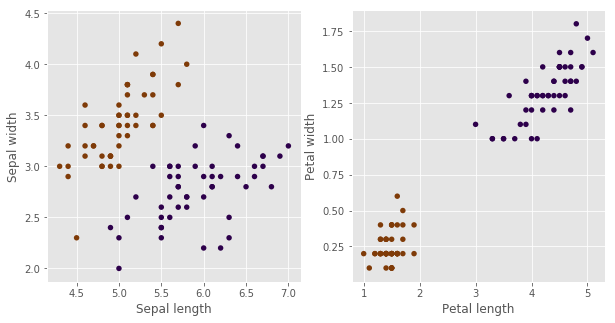

In [1004]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

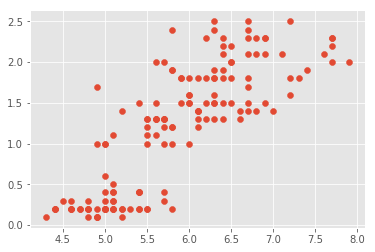

In [1005]:
pl.scatter(iris.data[:, 0], iris.data[:, 3])

In [1026]:
model = Clustering(k = 2, max_iter = 30, epsilon = 0.01, random_state = 2)
model.fit(x_iris)
y_hat = model.predict(x_iris)

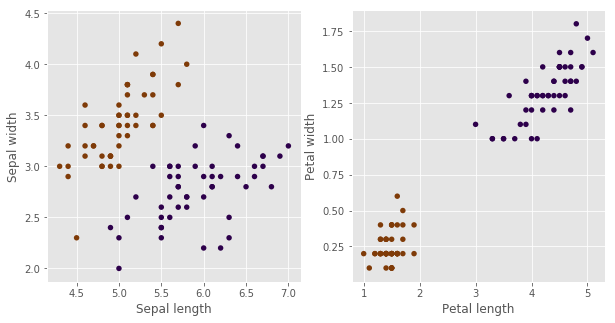

In [1027]:
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_hat, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_hat, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [1028]:
model = Clustering(k = 3, max_iter = 30, epsilon = 0.01, random_state = 2)
model.fit(x_iris)
y_hat = model.predict(x_iris)

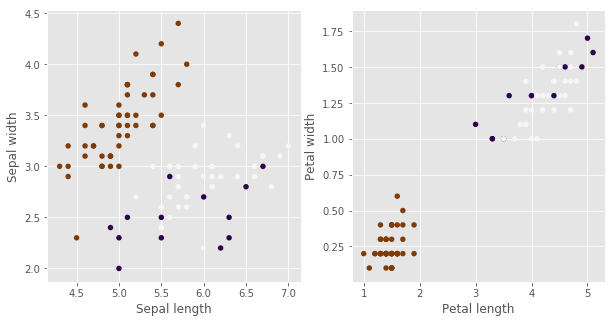

In [1029]:
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_hat, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_hat, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [83]:
pred_iris = Clustering(k = 2, max_iter = 50, epsilon = 0.00001, random_state = 11).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [998]:
pred_iris = Clustering(k = 3, max_iter = 50, epsilon = 0.00001, random_state = 2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 0.81


In [991]:
from sklearn import datasets
np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
X, y = datasets[2]

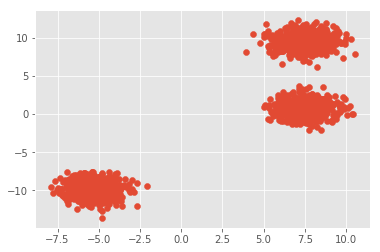

In [992]:
plt.scatter(X[:, 0], X[:, 1])

In [1020]:
%%time
model = Clustering(k = 3, max_iter = 30, epsilon = 0.01, random_state = 2)
model.fit(X)
y_hat = model.predict(X)

CPU times: user 1.03 s, sys: 32 ms, total: 1.06 s
Wall time: 897 ms


In [1002]:
%%time
model = GaussianMixture(n_components=3)
model.fit(X)
y_hat = model.predict(X)

CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 21.3 ms


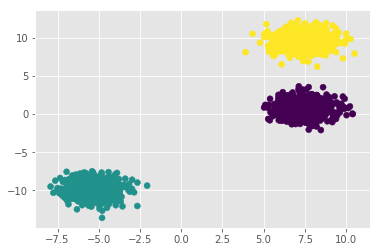

In [310]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat)

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

# Задание 2 

In [92]:
from scipy.spatial.distance import cdist

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

Воспользуемся известной нам метрикой adjusted rand score и посмотрим как она будет изменяться при увеличении параметров

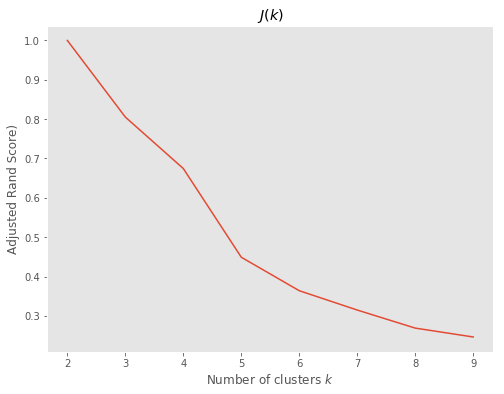

In [990]:
ks = range(2, 10)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k, max_iter = 30, epsilon = 0.01, random_state = 2)
    y = cls.fit_predict(x_iris)
    criteria[i] = smt.adjusted_rand_score(y_iris, y)
    
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Adjusted Rand Score)")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Заметим что при увеличении числа кластеров наша кластеризация все больше отличается от эталонного разбиение, что уже намекает нам что лучшее разбиение находится где-то в начале числа кластеров

In [86]:

def quality(x, y): # Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
    """
    Implement quality criterion of your choice
    """
    set(y)
    clusters = [[] for i in set(y)]
    for i in range(len(x)):
        clusters[y[i]].append(x[i])
    Sum = 0
    for i in range(len(clusters)):
        Middle = np.mean(clusters[i], axis = 0) # совпадает с центрами смесей нормальных распределений
        Sum += np.sum([np.sum((Middle-ob) ** 2) for ob in clusters[i]])
    return Sum

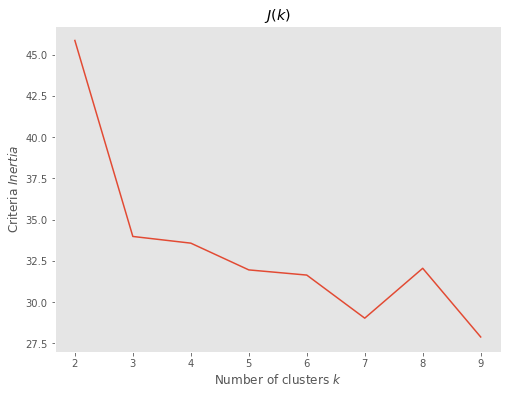

In [989]:
ks = range(2, 10)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k, max_iter = 50, epsilon = 0.00001, random_state = 11)
    y = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, y)
    
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $Inertia$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Последний график отображает метод локтя, на нем четко видна точка перегиба, когда число кластеров равно 3, далее значение уменьшается менее резко. Так же возможно некое уплотнение точек при 7-8 кластерах

# Задание 3

In [424]:
## Задание 3
!ls

hw2-clusters.ipynb  WDICountry.csv	   WDIData.csv
Untitled.ipynb	    WDICountry-Series.csv


In [497]:
import pandas as pd

In [965]:
df = pd.read_csv('WDIData.csv')

In [967]:
data = df[['Country Name','Indicator Name','1980']]

In [968]:
data.head(30)

,Country Name,Indicator Name,1980
0,Arab World,"2005 PPP conversion factor, GDP (LCU per inter...",NaN
1,Arab World,"2005 PPP conversion factor, private consumptio...",NaN
2,Arab World,Access to clean fuels and technologies for coo...,NaN
3,Arab World,Access to electricity (% of population),NaN
4,Arab World,"Access to electricity, rural (% of rural popul...",NaN
5,Arab World,"Access to electricity, urban (% of urban popul...",NaN
6,Arab World,Account (% age 15+) [ts],NaN
7,Arab World,Account at a financial institution (% age 15+),NaN
8,Arab World,"Account at a financial institution, female (% ...",NaN
9,Arab World,"Account at a financial institution, income, po...",NaN


In [969]:
data = data.dropna(axis= 0)

In [970]:
data.head(5)

,Country Name,Indicator Name,1980
24,Arab World,"Adjusted net enrollment rate, primary (% of pr...",6.561777e+01
25,Arab World,"Adjusted net enrollment rate, primary, female ...",5.648679e+01
26,Arab World,"Adjusted net enrollment rate, primary, male (%...",7.437998e+01
29,Arab World,Adjusted net national income (current US$),2.420263e+11
32,Arab World,Adjusted net national income per capita (curre...,1.460722e+03


In [972]:
dframe = data['1980'].groupby([data['Country Name'],data['Indicator Name']]).sum().unstack()

In [973]:
dframe # 

Indicator Name,"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)",...,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Vulnerable employment, female (% of female employment)","Vulnerable employment, male (% of male employment)","Vulnerable employment, total (% of total employment)","Wage and salaried workers, female (% of female employment)","Wage and salaried workers, male (% of male employment)","Wage and salaried workers, total (% of total employment)",Wholesale price index (2010 = 100)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,3.484587e+09,NaN,NaN,263.020054,NaN,...,15.681000,1.141959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.762000,2.827020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,16.781384,5.115578e+10,2.999032e+10,13.297131,2645.389307,1550.871923,18.533494,...,43.542000,5.063688,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.330000,3.064084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.064000,4.405212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.766000,5.969475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.618000,0.114131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,65.617767,56.48679,74.379982,NaN,NaN,2.420263e+11,NaN,NaN,1460.721977,17.529698,...,44.816588,4.541820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,5.668563,1.966623e+11,6.788148e+10,4.084415,6997.192853,2415.204862,13.754464,...,82.887000,1.959118,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [974]:
for frame in dframe.columns: #идем по названиям столбцов
    dframe[frame].fillna(dframe[frame].mean(), inplace = True)
dframe

Indicator Name,"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)",...,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Vulnerable employment, female (% of female employment)","Vulnerable employment, male (% of male employment)","Vulnerable employment, total (% of total employment)","Wage and salaried workers, female (% of female employment)","Wage and salaried workers, male (% of male employment)","Wage and salaried workers, total (% of total employment)",Wholesale price index (2010 = 100)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,74.345826,68.166244,78.425989,5.761742,1.426147e+12,3.484587e+09,3.851199,8558.699627,263.020054,11.135739,...,15.681000,1.141959,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Albania,74.345826,68.166244,78.425989,5.761742,1.426147e+12,4.359933e+11,3.851199,8558.699627,2878.734345,11.135739,...,33.762000,2.827020,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Algeria,74.345826,68.166244,78.425989,16.781384,5.115578e+10,2.999032e+10,13.297131,2645.389307,1550.871923,18.533494,...,43.542000,5.063688,0.000000e+00,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
American Samoa,74.345826,68.166244,78.425989,5.761742,1.426147e+12,4.359933e+11,3.851199,8558.699627,2878.734345,11.135739,...,74.330000,3.064084,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Andorra,74.345826,68.166244,78.425989,5.761742,1.426147e+12,4.359933e+11,3.851199,8558.699627,2878.734345,11.135739,...,92.064000,4.405212,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Angola,74.345826,68.166244,78.425989,5.761742,1.426147e+12,4.359933e+11,3.851199,8558.699627,2878.734345,11.135739,...,19.766000,5.969475,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Antigua and Barbuda,74.345826,68.166244,78.425989,5.761742,1.426147e+12,4.359933e+11,3.851199,8558.699627,2878.734345,11.135739,...,34.618000,0.114131,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Arab World,65.617767,56.486790,74.379982,5.761742,1.426147e+12,2.420263e+11,3.851199,8558.699627,1460.721977,17.529698,...,44.816588,4.541820,5.306491e+08,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01
Argentina,74.345826,68.166244,78.425989,5.668563,1.966623e+11,6.788148e+10,4.084415,6997.192853,2415.204862,13.754464,...,82.887000,1.959118,0.000000e+00,7.005,9.51,6.70,92.129997,86.974998,91.643333,2.953987e+01


In [975]:
Country_name = np.array(list(dframe.axes[0]))

In [976]:
Array = np.array(dframe)

In [977]:
Array

array([[  7.43458264e+01,   6.81662438e+01,   7.84259887e+01, ...,
          8.69749985e+01,   9.16433334e+01,   2.95398656e+01],
       [  7.43458264e+01,   6.81662438e+01,   7.84259887e+01, ...,
          8.69749985e+01,   9.16433334e+01,   2.95398656e+01],
       [  7.43458264e+01,   6.81662438e+01,   7.84259887e+01, ...,
          8.69749985e+01,   9.16433334e+01,   2.95398656e+01],
       ..., 
       [  7.43458264e+01,   6.81662438e+01,   7.84259887e+01, ...,
          8.69749985e+01,   9.16433334e+01,   2.95398656e+01],
       [  7.43458264e+01,   6.81662438e+01,   7.84259887e+01, ...,
          8.69749985e+01,   9.16433334e+01,   7.47965518e-02],
       [  7.43458264e+01,   6.81662438e+01,   7.84259887e+01, ...,
          8.69749985e+01,   9.16433334e+01,   2.95398656e+01]])

Воспользуемся T-SNE чтобы снизить размерность и визуализировать данные, чтобы визуально определить на сколько кластеров стоит разбить 

In [981]:
Array_embedded = TSNE(n_components= 2).fit_transform(Array)

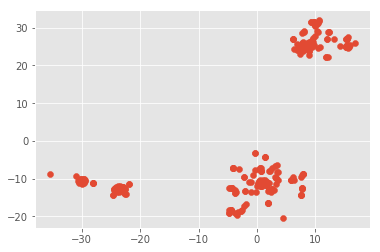

In [983]:
plt.scatter(Array_embedded[:, 0], Array_embedded[:, 1])

In [985]:
model = Clustering(k = 3, max_iter = 30, epsilon = 0.00001, random_state = 2)
model.fit(Array_embedded)
y_Array = model.predict(Array_embedded)

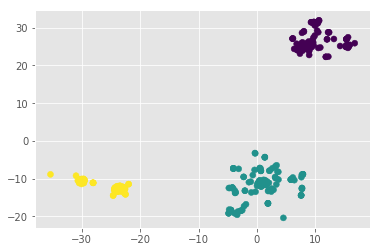

In [986]:
plt.scatter(Array_embedded[:, 0], Array_embedded[:, 1], c = y_Array)

Страны хорошо визуально кластерилизовались

In [963]:
Country_clusters = [[] for i in range(len(set(y_Array)))]
for i in range(len(y_Array)):
    Country_clusters[y_Array[i]].append(Country_name[i])

In [964]:
Country_clusters

[['Algeria',
  'Argentina',
  'Australia',
  'Austria',
  'Bangladesh',
  'Belgium',
  'Belize',
  'Benin',
  'Bolivia',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Cameroon',
  'Canada',
  'Chad',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  'Costa Rica',
  'Cuba',
  'Cyprus',
  'Denmark',
  'Dominican Republic',
  'Ecuador',
  'Egypt, Arab Rep.',
  'El Salvador',
  'Equatorial Guinea',
  'Fiji',
  'Finland',
  'France',
  'Gabon',
  'Gambia, The',
  'Germany',
  'Greece',
  'Guatemala',
  'Honduras',
  'Hong Kong SAR, China',
  'Iceland',
  'India',
  'Ireland',
  'Italy',
  'Jordan',
  'Kenya',
  'Lesotho',
  'Luxembourg',
  'Madagascar',
  'Malaysia',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Mexico',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Norway',
  'Pakistan',
  'Panama',
  'Papua New Guinea',
  'Peru',
  'Philippines',
  'Portugal',
  'Puerto Rico',
  'Rwanda',
  'Senegal',
  'Sierra Leone',
  'Si

# Задание 4

Визуально посмотрев на страны можно сказать, что в первый кластер попали наиболее развитые страны, это можно заключить исходя из того, что туда вошли большинство стран Европы, Америка, Канада и так далее, во второй кластер вошли менее развитые страны, а в третьем видна уентральная часть Африки

Попробую визуализировать страны, для этого хорошо бы определить координаты этих стран, воспользуемся для этого библиотекой GeoPy и будем искать по названиям стран их координаты

In [739]:
import geopy

In [962]:
from geopy.geocoders import Nominatim # пример нахождения координат по стране
geolocator = Nominatim()
location = geolocator.geocode(Country_clusters[0][0])
print (location.latitude, location.longitude)

(28.0000272, 2.9999825)


Найдем координаты по названиям стран, для визуализации стран на карте

In [819]:
Coordinates = [[] for i in range(len(set(y_Array)))]

In [943]:
for i in Country_clusters[1]:
    location = geolocator.geocode(i)
    Coordinates[1].append([location.latitude, location.longitude])

In [945]:
for i in Country_clusters[2]:
    location = geolocator.geocode(i)
    Coordinates[2].append([location.latitude, location.longitude])

In [941]:
Coordinates # Координаты стран кластеров

[[[28.0000272, 2.9999825],
  [-34.9964963, -64.9672817],
  [-24.7761086, 134.755],
  [47.2000338, 13.199959],
  [24.4768783, 90.2932426],
  [50.6407351, 4.66696],
  [16.8259793, -88.7600927],
  [6.3330586, 5.6221058],
  [-17.0568696, -64.9912286],
  [-23.1681782, 24.5928742],
  [-10.3333333, -53.2],
  [42.6073975, 25.4856617],
  [12.0753083, -1.6880314],
  [4.6125522, 13.1535811],
  [61.0666922, -107.9917071],
  [15.6134137, 19.0156172],
  [-12.2045176, 44.2832964],
  [10.2735633, -84.0739102],
  [23.0131338, -80.8328748],
  [34.9823018, 33.1451285],
  [55.670249, 10.3333283],
  [19.0974031, -70.3028026],
  [-1.3397668, -79.3666965],
  [13.8000382, -88.9140683],
  [1.613172, 10.5170357],
  [-18.1239696, 179.0122737],
  [63.2467777, 25.9209164],
  [46.603354, 1.8883335],
  [-0.8999695, 11.6899699],
  [7.5290563, -11.9729409],
  [51.0834196, 10.4234469],
  [38.9953683, 21.9877132],
  [15.6356088, -89.8988087],
  [15.0610686, -84.5978534],
  [39.8871676, 8.6026857],
  [51.38660965, 0.5477

Coordinates = [[[28.0000272, 2.9999825],
  [-34.9964963, -64.9672817],
  [-24.7761086, 134.755],
  [47.2000338, 13.199959],
  [24.4768783, 90.2932426],
  [50.6407351, 4.66696],
  [16.8259793, -88.7600927],
  [6.3330586, 5.6221058],
  [-17.0568696, -64.9912286],
  [-23.1681782, 24.5928742],
  [-10.3333333, -53.2],
  [42.6073975, 25.4856617],
  [12.0753083, -1.6880314],
  [4.6125522, 13.1535811],
  [61.0666922, -107.9917071],
  [15.6134137, 19.0156172],
  [-12.2045176, 44.2832964],
  [10.2735633, -84.0739102],
  [23.0131338, -80.8328748],
  [34.9823018, 33.1451285],
  [55.670249, 10.3333283],
  [19.0974031, -70.3028026],
  [-1.3397668, -79.3666965],
  [13.8000382, -88.9140683],
  [1.613172, 10.5170357],
  [-18.1239696, 179.0122737],
  [63.2467777, 25.9209164],
  [46.603354, 1.8883335],
  [-0.8999695, 11.6899699],
  [7.5290563, -11.9729409],
  [51.0834196, 10.4234469],
  [38.9953683, 21.9877132],
  [15.6356088, -89.8988087],
  [15.0610686, -84.5978534],
  [39.8871676, 8.6026857],
  [51.38660965, 0.547714867236488],
  [22.3511148, 78.6677428],
  [52.865196, -7.9794599],
  [42.6384261, 12.674297],
  [10.6115886, 122.535946336233],
  [1.4419683, 38.4313975],
  [-29.6039267, 28.3350193],
  [49.963667, 5.43991862540759],
  [-18.78295335, 46.7119260933426],
  [2.3923759, 112.8471939],
  [16.3700359, -2.2900239],
  [25.21534785, 55.167825505776],
  [-20.2759451, 57.5703566],
  [19.4326009, -99.1333416],
  [31.1728192, -7.3366043],
  [19.058889, -96.254167],
  [-23.2335499, 17.3231107],
  [52.2379891, 5.53460738161551],
  [-41.5000831, 172.8344077],
  [12.3724928, -84.8700308],
  [64.5731537, 11.5280364395482],
  [30.3308401, 71.247499],
  [35.266906, -119.0567707],
  [-5.6816069, 144.2489081],
  [41.3274302, -89.1288762],
  [12.7503486, 122.7312101],
  [40.033265, -7.8896263],
  [18.22141715, -66.4132818505648],
  [-1.9646631, 30.0644358],
  [14.4750607, -14.4529612],
  [8.6400349, -11.8400269],
  [1.2904753, 103.8520359],
  [-13.180556, 15.266667],
  [-28.8166236, 24.991639],
  [40.0028028, -4.003104],
  [25.2295108, 55.1821420307293],
  [14.5844444, 29.4917691],
  [-26.5624806, 31.3991317],
  [59.6749712, 14.5208584],
  [46.7985624, 8.2319736],
  [34.6401861, 39.0494106],
  [14.8971921, 100.83273],
  [8.7800265, 1.0199765],
  [10.8677845, -60.9821067],
  [33.8439408, 9.400138],
  [25.2232283, 55.1594933008754],
  [39.7837304, -100.4458825],
  [-32.8755548, -56.0201525],
  [9.7887018, -63.1982373],
  [-18.4554963, 29.7468414]],
[[33.7680065, 66.2385139],
  [-14.30063095, -170.695974791655],
  [-11.8775768, 17.5691241],
  [17.018112, 54.1048659198173],
  [4.4922673, -75.7396253904384],
  [12.5013629, -69.9618475],
  [40.3936294, 47.7872508],
  [53.4250605, 27.6971358],
  [44.3053476, 17.5961467],
  [18.4024395, -64.5661642],
  [13.5066394, 104.869423],
  [19.5417212, -80.5667132],
  [48.8005051, -123.3831619],
  [-31.7613365, -71.3187697],
  [45.5643442, 17.0118954],
  [12.1845, -68.9640918594077],
  [49.8167003, 15.4749544],
  [11.85677545, 42.7577845199437],
  [49.4212299, 8.4297698],
  [25.22091845, 55.1728479503109],
  [58.7523778, 25.3319078],
  [10.2116702, 38.6521203],
  [38.6811851, -9.1546646],
  [47.51177715, 19.0761161101566],
  [-1.2969234, 36.8134606],
  [62.19850045, -6.81741243341217],
  [13.444138, 144.733626445767],
  [38.1440893, -77.4391124],
  [18.98801315, -72.2946027714031],
  [18.98801315, -72.2946027714031],
  [47.1817585, 19.5060937],
  [51.2459058, 3.6024069],
  [51.0797841, 3.75800968816695],
  [-4.7993356, 114.5632032],
  [47.2286086, 65.2093197],
  [17.97013815, 102.633169763102],
  [10.66176735, -61.5129163],
  [40.3429683, -76.4233816],
  [26.8234472, 18.1236723],
  [55.3500003, 23.7499997]],
 [[11.24488255, -72.5160988093715],
  [42.5407167, 1.5732033],
  [17.079128, -61.8222516],
  [24.7736546, -78.0000547],
  [35.2078012, 72.5473968],
  [13.1500331, -59.5250305],
  [32.3018217, -64.7603583],
  [27.549511, 90.5119273],
  [4.4137155, 114.5653908],
  [-3.3634357, 29.8870575],
  [16.0000552, -24.0083947],
  [25.2183959, 55.1752385762154],
  [25.4915799, -98.9811115045569],
  [7.9897371, -5.5679458],
  [15.4113138, -61.3653618],
  [-18.6243749, -144.6434898],
  [8.0300284, -1.0800271],
  [12.1360374, -61.6904045]]]
# - Я сохраняю тут выкаченные даные в случае перезагрузки нужно просто считать эту ячейку

Отобразим наши кластеры на карте

In [766]:
import folium

In [767]:
from folium.plugins import MarkerCluster
%matplotlib inline

In [896]:
World = folium.Map(control_scale=True)

In [897]:
Places_cluster = MarkerCluster(locations=Coordinates[0])

In [898]:
Places_cluster.add_to(World)

In [899]:
World # Страны из первого кластера

In [935]:
World1 = folium.Map(control_scale=True)
Places_cluster = MarkerCluster(locations=Coordinates[1])
Places_cluster.add_to(World1)
World1 # Страны из второго кластера

In [987]:
World2 = folium.Map(control_scale=True)
Places_cluster = MarkerCluster(locations=Coordinates[2])
Places_cluster.add_to(World2)
World2 # Страны из третьего кластера

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.